In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calGram(X, kernel_fcn):
    n = X.shape[0]

    # ----- width of X -----
    G = np.sum(X*X, 1).reshape(n,1)
    Q = np.tile(G, (1, n) )
    R = np.tile(G.T, (n, 1) )

    dists = Q + R - 2 * X @ X.T
    dists = dists - np.tril(dists)
    dists = dists.reshape(n**2, 1)

    width_x = np.sqrt( 0.5 * np.median(dists[dists>0]) )
    
    H = np.identity(n) - np.ones((n,n), dtype = float) / n
    K = kernel_fcn(X, X, width_x)
    Kc = H @ K @ H
    return Kc

def rbf_kernel(pattern1, pattern2, deg):
    size1 = pattern1.shape
    size2 = pattern2.shape

    G = np.sum(pattern1*pattern1, 1).reshape(size1[0],1)
    H = np.sum(pattern2*pattern2, 1).reshape(size2[0],1)

    Q = np.tile(G, (1, size2[0]))
    R = np.tile(H.T, (size1[0], 1))

    H = Q + R - 2 * pattern1 @ pattern2.T

    H = np.exp(-H/2/(deg**2))

    return H

def assignCluster(PI, point, cluster):
    PI_new = PI.copy()
    PI_new[point, :] = 0
    PI_new[point, cluster] = 1
    return PI_new

def randomClusters(num_data, num_cluster):
    PI = np.zeros((num_data, num_cluster))
    assigned = np.random.randint(low=0, high=num_cluster, size=PI.shape[0])
    for r, c in enumerate(assigned): PI[r, c] = 1
    return PI  

def plotClusteredPoints(data, labels, c):
    labeled_data = np.c_[data, labels]
    clustered_pts = {i: list(filter(lambda x: x[-1] == i, labeled_data)) for i in range(c)}
    clustered_pts = {i: [[x[0] for x in v], [x[1] for x in v]] for i, v in clustered_pts.items()}
    plt.figure()
    for label, dta in clustered_pts.items():
        plt.scatter(dta[0], dta[1], label=str(label))
    plt.legend()
    plt.show()  


In [3]:
def CLUHSIC(K, A, m, c, verbose=True):
    PI = randomClusters(m, c)
    max_iterations = 50
    iter = 0
    while iter <= max_iterations:
        if verbose:
            print(f'Clustered data after {iter} iterations')
            labels = np.argmax(PI, axis=1)
            plotClusteredPoints(data, labels, c)
            print()

        PI0 = PI.copy()
        for i in range(m):
            clusters_tmp = [assignCluster(PI, i, j) for j in range(c)]
            j0 = np.argmax([np.trace(K @ PI_tmp @ A @ PI_tmp.T) for PI_tmp in clusters_tmp])
            PI = assignCluster(PI, i, j0)    
        
        stop = (PI == PI0).all()
        if stop: break
        iter += 1
        
    return PI

In [4]:
seed = 1
np.random.seed(seed)
points1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], 100)
points2 = np.random.multivariate_normal([-2, -2], [[1, 0.5], [0.5, 1]], 100)
points3 = np.random.multivariate_normal([-2, 2], [[1, -0.5], [-0.5, 1]], 100)
points4 = np.random.multivariate_normal([2, -2], [[1, -0.5], [-0.5, 1]], 100)
data = np.vstack([
                  points1, 
                  points2, 
                  points3,
                  points4,
                ])
np.random.shuffle(data)
print(data.shape)

(400, 2)


In [5]:
m = data.shape[0]
c = 4
K = calGram(data, rbf_kernel)
A = np.identity(c)
# A = np.array([[2, 1, 0, 1],
#               [1, 2, 1, 0],
#               [0, 1, 2, 1],
#               [1, 0, 1, 2],]
#               )

Clustered data after 0 iterations


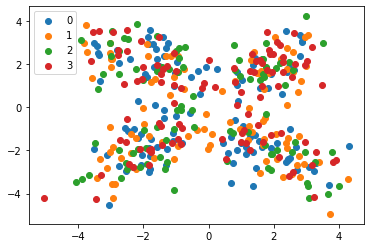


Clustered data after 1 iterations


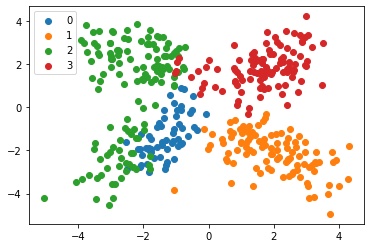


Clustered data after 2 iterations


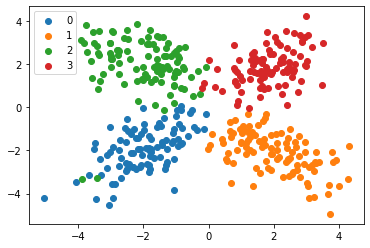


Clustered data after 3 iterations


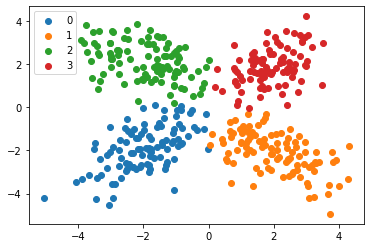


Final clustered data


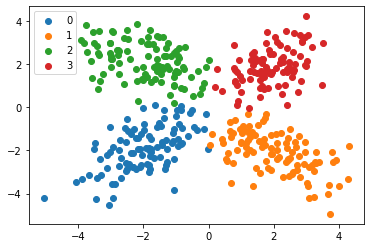

In [6]:
seed = 1
np.random.seed(seed)

PI = CLUHSIC(K, A, m, c)

print('Final clustered data')  
labels = np.argmax(PI, axis=1)  
plotClusteredPoints(data, labels, c)  

Clustered data after 0 iterations


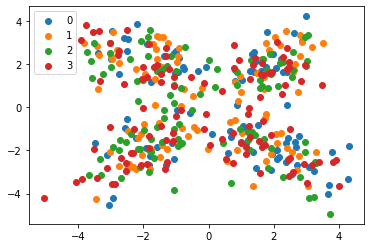


Clustered data after 1 iterations


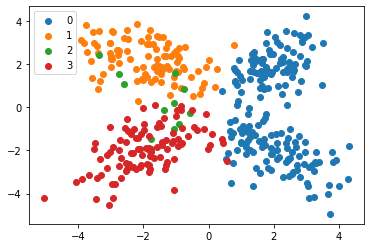


Clustered data after 2 iterations


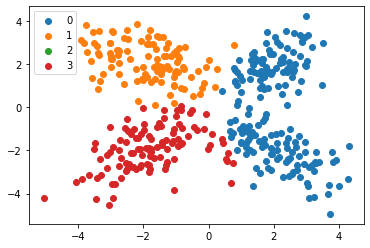


Final clustered data


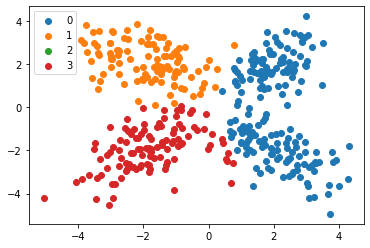

In [7]:
seed = 2
np.random.seed(seed)

PI = CLUHSIC(K, A, m, c)

print('Final clustered data')  
labels = np.argmax(PI, axis=1)  
plotClusteredPoints(data, labels, c) 